In [64]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [81]:
# SQL Connection and attributes
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
Base = automap_base()
Base.prepare(engine, reflect=True)

In [66]:
session = Session(bind=engine)

In [91]:
# Verify tables and structure from SQLite database
inspector = inspect(engine)
tbl_names = inspector.get_table_names()
i =1 
for table in tbl_names:
    print("Table "+str(i)+": "+str(table))
    i = i+1
    columns = inspector.get_columns(table)
    for col in columns:
        print("     Col: "+str(col["name"])+" ("+str(col["type"])+")")

Table 1: measurement
     Col: id (INTEGER)
     Col: station (TEXT)
     Col: date (TEXT)
     Col: prcp (FLOAT)
     Col: tobs (FLOAT)
Table 2: station
     Col: id (INTEGER)
     Col: station (TEXT)
     Col: name (TEXT)
     Col: latitude (FLOAT)
     Col: longitude (FLOAT)
     Col: elevation (FLOAT)


In [93]:
# Obtaining class information
print(str(inspector.get_pk_constraint("station")))
print(str(inspector.get_pk_constraint("measurement")))

{'constrained_columns': ['id'], 'name': None}
{'constrained_columns': ['id'], 'name': None}


In [94]:
# Assigning table classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [123]:
precipitation_analysis_1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()

In [124]:
pre_df = pd.DataFrame(precipitation_analysis_1)

In [125]:
pre_df['date'] = pd.to_datetime(pre_df['date'])

In [126]:
prec_df = pre_df.set_index('date')
prec_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


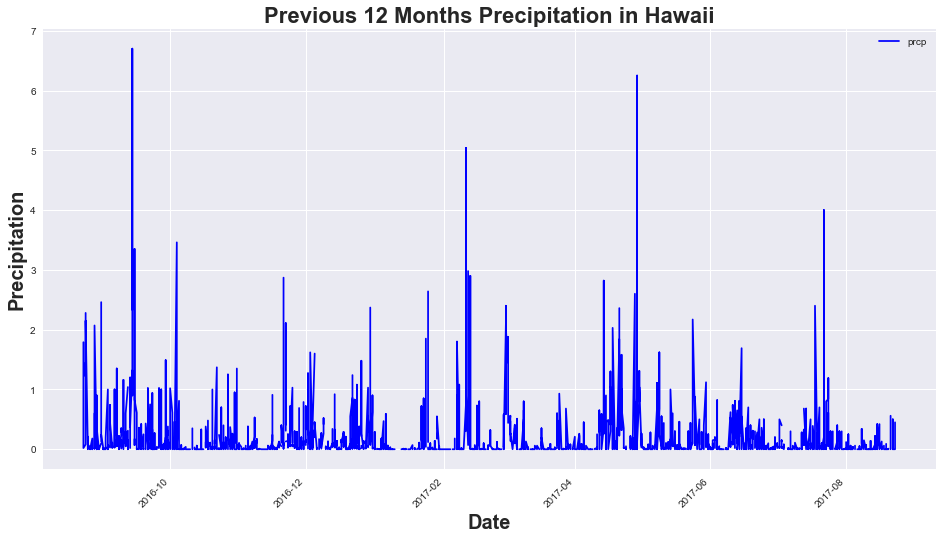

In [132]:
#plot
prec_plot = prec_df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', weight='bold', fontsize=20)
plt.xlabel('Date', weight='bold', fontsize=20)
plt.title("Previous 12 Months Precipitation in Hawaii",weight='bold', fontsize=22)
plt.show()

In [106]:
#show short statistical analysis for data
prec_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [108]:
station_num = session.query(Station.id).count()
station_num

9

In [109]:
most_active_station = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [110]:
most_active_station
#Waihee has highest number of observations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [112]:
waihee_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").\
all()

In [113]:
len(waihee_tobs)

352

In [114]:
print(waihee_tobs[0][0])

77.0


In [137]:
temperatures = [temp[0] for temp in waihee_tobs]
temperatures

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

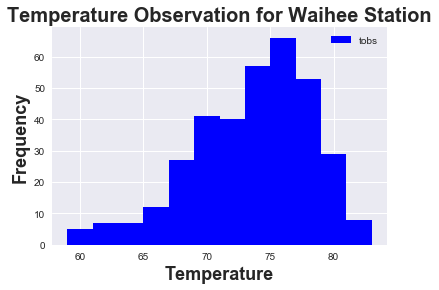

In [136]:
plt.hist(temperatures, bins=12, color='b')
plt.title("Temperature Observation for Waihee Station", fontweight='bold',fontsize=20)
plt.ylabel('Frequency', weight='bold', fontsize=18)
plt.xlabel('Temperature', weight='bold', fontsize=18)
labels = ['tobs']
plt.legend(labels)